In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/dataset-kidney-stone.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   gravity     90 non-null     float64
 2   ph          90 non-null     float64
 3   osmo        90 non-null     int64  
 4   cond        90 non-null     float64
 5   urea        90 non-null     int64  
 6   calc        90 non-null     float64
 7   target      90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [ ]:
df.head()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0


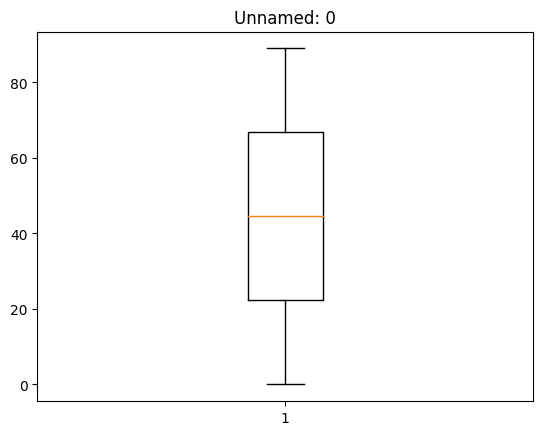

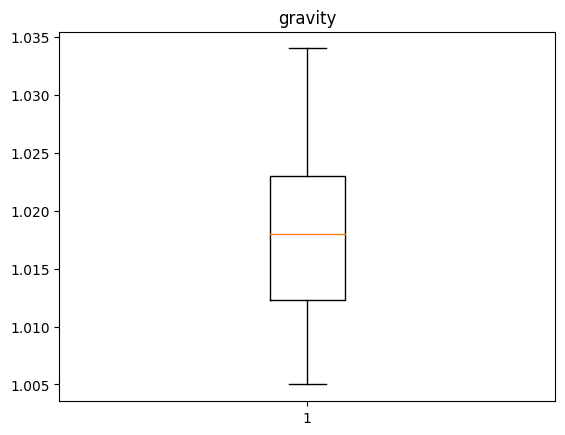

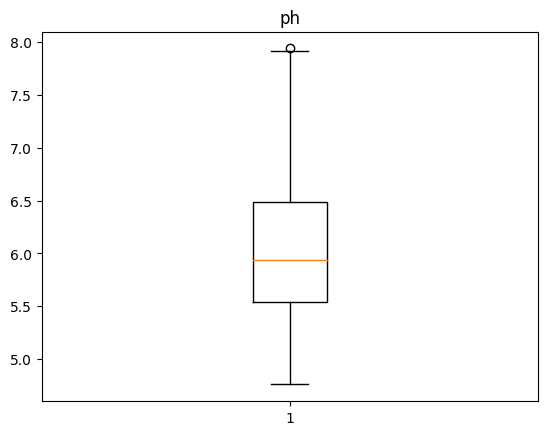

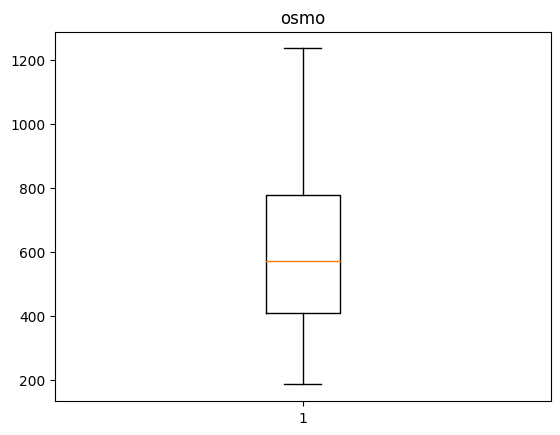

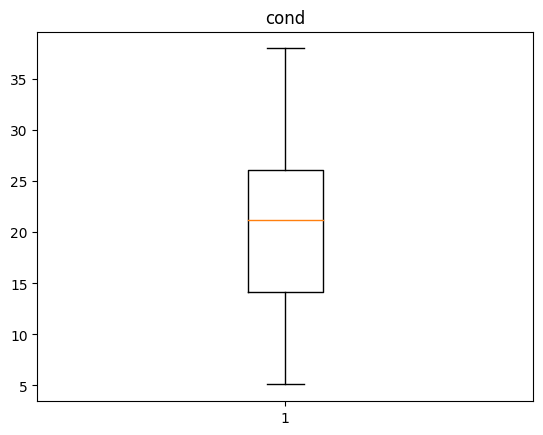

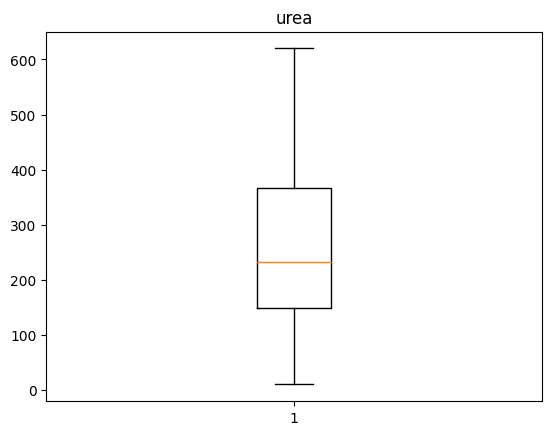

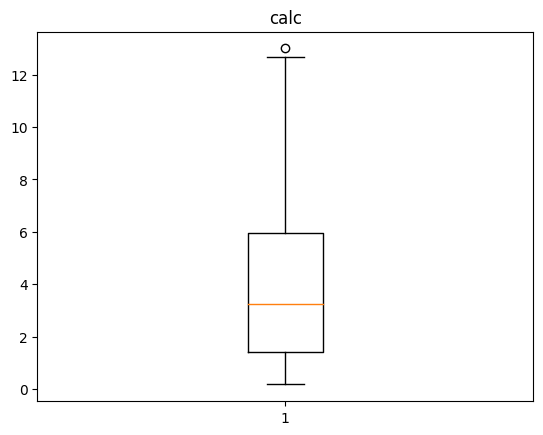

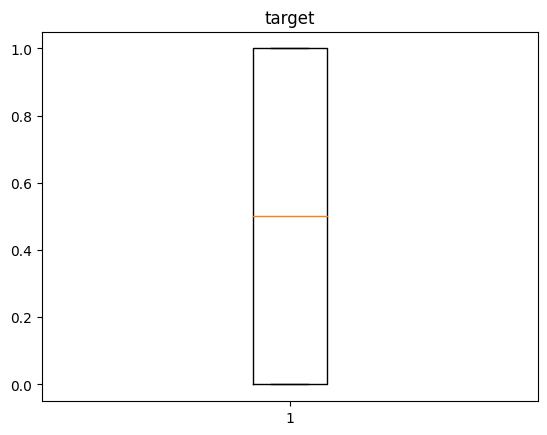

In [ ]:
for i in df.columns:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

Put the data into boxplot visualization to see outliers. We can see that there are only 2 features that have distinctive outliers, but few. So we will not perform outlier removal. 


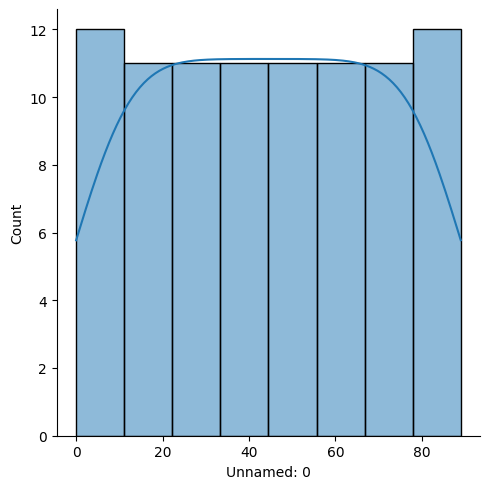

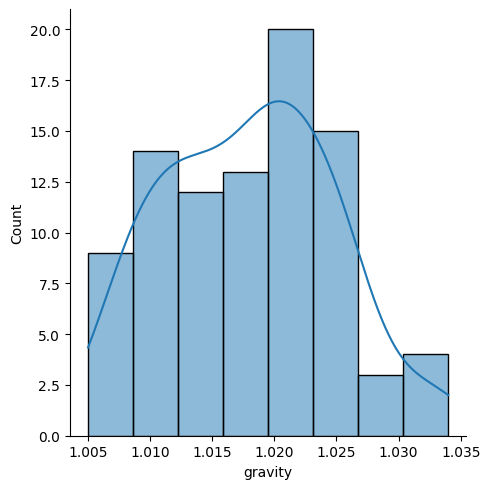

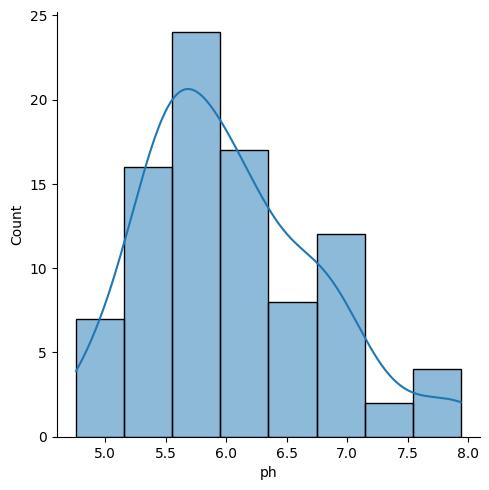

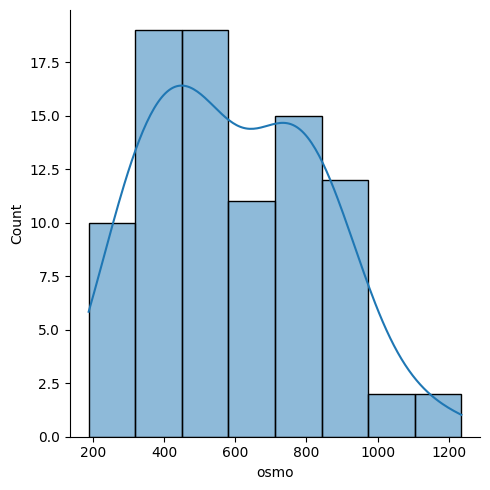

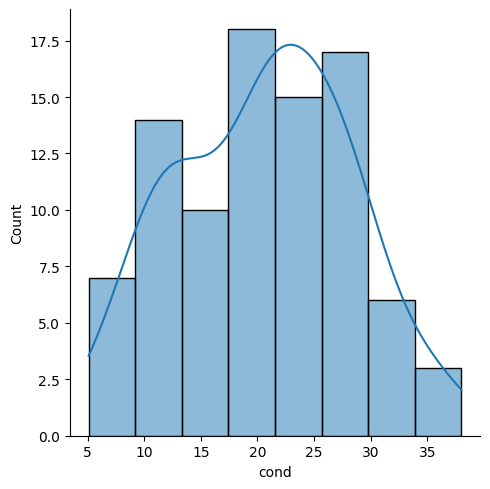

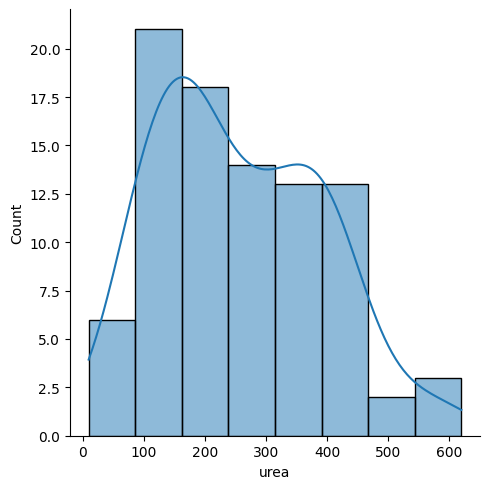

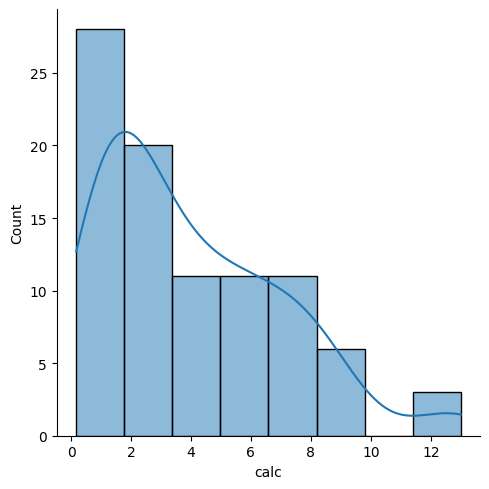

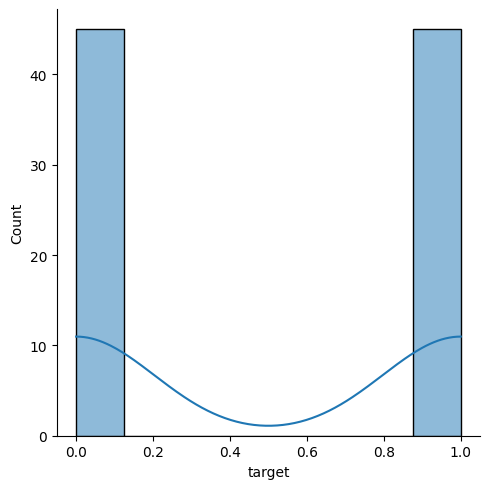

In [ ]:
#seeing distributions of data and skewness
for i in df.columns:
    sns.displot(df, x=i, kde=True)


Regarding to skewness of the data, the histogram above shows that the feature 'calc' has a left skewed distribution, same case for Urea, Osmo, and Ph. 


In [ ]:

#standardize the data
x = df.drop(['target','Unnamed: 0'], axis=1)
y = df['target']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']] = scaler.fit_transform(df[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']])

In [ ]:
x[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']] = x[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']].apply(lambda y: y/y.max(), axis=0)

In [ ]:
x

,gravity,ph,osmo,cond,urea,calc
0,0.189939,-0.591931,0.193582,-0.381032,0.510779,-0.174544
1,-0.059311,-0.155857,-0.039979,-0.035774,0.104478,0.052572
2,-0.620123,0.611212,-0.443977,-0.329243,-0.434494,-0.184563
3,-0.433185,-0.276697,-0.306681,-0.461592,-0.094527,-0.207943
4,-0.807060,0.253947,-0.655445,-0.755061,-0.462134,-0.318161
...,...,...,...,...,...,...
85,0.218083,-0.252486,0.242504,0.208294,0.300719,0.406507
86,-0.090413,0.453730,-0.084166,-0.004137,-0.149807,0.195661
87,0.922367,-0.311640,0.761704,0.147711,0.878386,0.517287
88,0.368796,-0.488727,-0.437664,-0.488943,-0.575456,-0.360286


In [ ]:
#split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
y_pred = clf.predict(X_test)
xgboosts, xgboosts2, _ = roc_curve(y_test, y_pred)
print(classification_report(y_test, y_pred))
auc_roc = roc_auc_score(y_test, y_pred)
print('AUC-ROC score:', auc_roc)
print('MAE: ',mean_absolute_error(y_test, y_pred))
print('MSE: ',mean_squared_error(y_test, y_pred))
print('R2: ',r2_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.71      0.71      0.71         7

    accuracy                           0.78        18
   macro avg       0.77      0.77      0.77        18
weighted avg       0.78      0.78      0.78        18

AUC-ROC score: 0.7662337662337663
MAE:  0.2222222222222222
MSE:  0.2222222222222222
R2:  0.06493506493506507


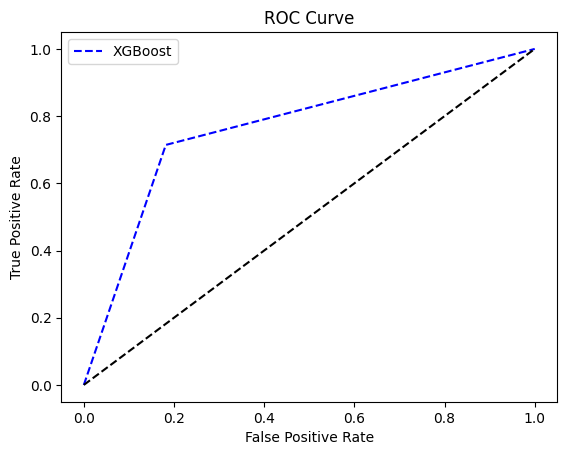

In [ ]:
plt.plot(xgboosts, xgboosts2,linestyle="--", color='blue', label='XGBoost')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

rg = xgb.XGBClassifier()
param = {'learning_rate': uniform(0,1),
         'max_depth': randint(1,10),
          'n_estimators': randint(100,1000)}

In [ ]:
search = RandomizedSearchCV(rg, param, n_iter=10,cv=5,random_state=42,n_jobs=-1,
)
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f64e76a64f0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f64e4998a00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f64e4a14a90>},
                   random_state=42)

In [ ]:
best_param = search.best_params_
rg_test = xgb.XGBClassifier(**best_param, random_state=42)
rg_test.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3042422429595377,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=352, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score, roc_auc_score,precision_score, roc_curve, classification_report, precision_recall_curve
y_train_pred = rg_test.predict(X_train)
y_test_pred = rg_test.predict(X_test)
xgboosts_test, xgboosts2_test, _ = roc_curve(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
auc_roc = roc_auc_score(y_test, y_test_pred)
print('AUC-ROC score for testing:', auc_roc)
print('MAE for testing: ',mean_absolute_error(y_test, y_test_pred))
print('MSE for testing: ',mean_squared_error(y_test, y_test_pred))
print('R2 for testing: ',r2_score(y_test, y_test_pred))

xgbBestPs, xgbBestPt, _ = roc_curve(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
auc_roc = roc_auc_score(y_train, y_train_pred)
print('AUC-ROC score for training:', auc_roc)
print('MAE for training: ',mean_absolute_error(y_train, y_train_pred))
print('MSE for training: ',mean_squared_error(y_train, y_train_pred))
print('R2 for training: ',r2_score(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

AUC-ROC score for testing: 1.0
MAE for testing:  0.0
MSE for testing:  0.0
R2 for testing:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        38

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

AUC-ROC score for training: 1.0
MAE for training:  0.0
MSE for training:  0.0
R2 for training:  1.0


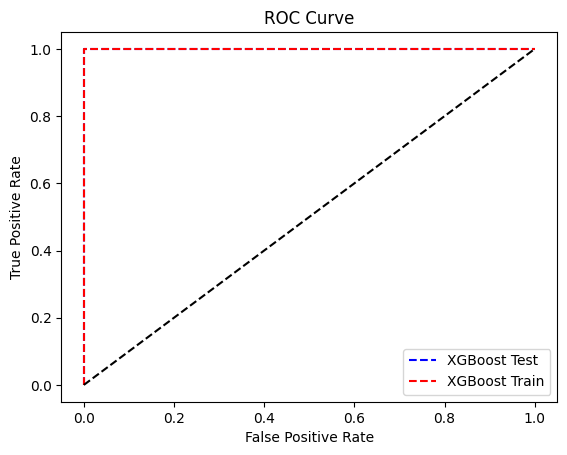

In [ ]:
plt.plot(xgboosts_test, xgboosts2_test,linestyle="--", color='blue', label='XGBoost Test')
plt.plot(xgbBestPs, xgbBestPt,linestyle="--", color='red', label='XGBoost Train')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

search = RandomizedSearchCV(rg, param, n_iter=10,cv=10)
After fine tuning these parameters and fit it in xgbclassifer, we found that xgoost with best parameters achieve a better result.
As a result, the scores for both testing and training are good, which concludes that our model can be useful for predicting kidney stone prediction. 

